# **Sprint 4.1** 

## **Exercicio 1. Consumir una API**

Selecciona una API pública i extreu dades utilitzant Python: **PyCoinGecko for PyCoinGecko_api** : ciente Python por Christoforou Emmanouil

El objetivo de este ejercicio es utilizar una API para obtener **datos de Bitcoin** y **analizarlos mediante gráficos de velas (candlestick)** en un notebook de Jupyter. Se busca mostrar la evolución del precio de Bitcoin a lo largo de 30 días y visualizar métricas adicionales como el **volumen de transacciones** y el **capital de mercado**. 

La API permite extraer información histórica de precios y otros datos relevantes, que luego se procesan y se **visualizan de manera interactiva por cada día/vela** utilizando gráficos en Plotly, con el fin de facilitar la comprensión de los **patrones del mercado de criptomonedas**.

Los datos de esta API están estructurados como un **diccionario**, que es una estructura de datos **clave-valor**. En este caso, las claves son los nombres de las diferentes variables o categorías de información (como "price", "volume", "market_cap"), y los valores asociados son los datos correspondientes a esas claves. Por ejemplo, bajo la clave "price" se podría almacenar una lista con los precios de Bitcoin a lo largo de un período de tiempo específico. 


In [18]:
!pip install pycoingecko

- Queremos ver si funciona y consumir ya unos datos de la API, como el precio actual y el número de monedas disponbles

In [18]:
import pandas as pd

from pycoingecko import CoinGeckoAPI
cg=CoinGeckoAPI()

bitcoin_now = cg.get_price(ids='bitcoin', vs_currencies='usd')
print("Bitcoin price in USD / precio de Bitcoin en US$ ahora:", bitcoin_now['bitcoin']['usd'])

# Example: List all supported coins
coins = cg.get_coins_list()
print(f"Total coins available now / monedas totales disponibles ahora: {len(coins)}")

Bitcoin price in USD: 90371
Total coins available: 15317


- Antes de crear un DataFrame, primero se extraen los nombres de todas las columnas. 
- Como se trata de un diccionario, se puede inspectar sus claves, o columnas para comprender su estructura

In [19]:
# Fetch Bitcoin's market chart data for the last 30 days
bitcoin_data = cg.get_coin_market_chart_by_id(id='bitcoin', vs_currency='usd', days=30)

# Extract column names from the dictionary keys
column_names = bitcoin_data.keys()

print("Column names in the data:")
print(column_names)


Column names in the data:
dict_keys(['prices', 'market_caps', 'total_volumes'])


In [20]:
# Inspect the first few rows of each key
for key, values in bitcoin_data.items():
    print(f"\nKey: {key}")
    print("First entries:", values[:1])



Key: prices
First entries: [[1729307804536, 68583.88574548792]]

Key: market_caps
First entries: [[1729307804536, 1355876360132.6643]]

Key: total_volumes
First entries: [[1729307804536, 30600819926.162006]]


## Creación del DataFrame

Convertimos **bitcoin_data** a Pandas DataFrame con columnas ***timestamp***, ***price***, ***volume***, y ***market_cap*** a partir del diccionario **'bitcoin_data'**

**Estructura de los datos originales:**

- bitcoin_data['prices'], bitcoin_data['total_volumes'], y bitcoin_data['market_caps'] son listas de listas. Cada sublista tiene el formato [timestamp, valor], donde:
timestamp: Es un valor en milisegundos que representa el tiempo.
- valor: Es el precio, volumen, o market cap, dependiendo de la lista.
- 
**Extracción de valores:**

[x[0] for x in prices]: Extrae el primer elemento (timestamp) de cada sublista dentro de prices.
[x[1] for x in prices]: Extrae el segundo elemento (price) de cada sublista dentro de prices.

Lo mismo aplica para volumes y market_caps.

**Construcción del DataFrame:**

- pd.DataFrame({}): Crea un DataFrame donde cada clave (como 'timestamp', 'price') corresponde a una columna y cada valor (como [x[0] for x in prices]) se convierte en una serie de datos (columnas del DataFrame).

In [21]:
import pandas as pd

# Extraemos datos de 'bitcoin_data'

prices = bitcoin_data['prices']
volumes = bitcoin_data['total_volumes']
market_caps = bitcoin_data['market_caps']

# Createamos el DataFrame

df_bitcoin = pd.DataFrame({
    'timestamp': [x[0] for x in prices],  # Extraer el primer valor (timestamp) de cada sublista
    'price': [x[1] for x in prices],     # Extraer el segundo valor (precio) de cada sublista
    'volume': [x[1] for x in volumes],   # Extraer el segundo valor (volumen) de cada sublista
    'market_cap': [x[1] for x in market_caps]  # Extraer el segundo valor (market cap) de cada sublista
})

print("Basic Info:")
print(df_bitcoin.info())

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   timestamp   721 non-null    int64  
 1   price       721 non-null    float64
 2   volume      721 non-null    float64
 3   market_cap  721 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 22.7 KB
None


In [22]:
# Display statistics
print("\nStatistics:")
print(df_bitcoin.describe())


Statistics:
          timestamp         price        volume    market_cap
count  7.210000e+02    721.000000  7.210000e+02  7.210000e+02
mean   1.730603e+12  74733.611573  5.750604e+10  1.478048e+12
std    7.497556e+08   8505.248271  3.675923e+10  1.685618e+11
min    1.729308e+12  65441.769989  1.124493e+10  1.297204e+12
25%    1.729956e+12  68188.533697  3.351398e+10  1.347894e+12
50%    1.730604e+12  70294.703833  4.579086e+10  1.388806e+12
75%    1.731251e+12  79687.471387  6.982049e+10  1.576344e+12
max    1.731899e+12  92468.726966  1.746336e+11  1.835629e+12


In [23]:
df_bitcoin

timestamp         price        volume    market_cap
0    1729307804536  68583.885745  3.060082e+10  1.355876e+12
1    1729311427809  68511.127765  3.007779e+10  1.355140e+12
2    1729314304518  68328.062317  3.147555e+10  1.351635e+12
3    1729318882437  68421.949743  3.238385e+10  1.352114e+12
4    1729321376939  68320.548019  3.345937e+10  1.350748e+12
..             ...           ...           ...           ...
716  1731885109126  89574.747275  4.947624e+10  1.771628e+12
717  1731888455977  89794.981793  4.847598e+10  1.777256e+12
718  1731891666793  89903.467214  5.256013e+10  1.778545e+12
719  1731895436913  90801.317670  5.289465e+10  1.798291e+12
720  1731899458000  90337.003191  5.045424e+10  1.787406e+12

[721 rows x 4 columns]

## Agregar una columna con el timestamp convertido

Para convertir la columna timestamp al formato de fecha y hora legible, puedes usar pd.to_datetime(). Es importante que mantengamos tanto la columna original (timestamp) como la nueva (datetime) para comparar.

Función **pd.to_datetime:**

- Esta función convierte valores numéricos o cadenas de texto en objetos de fecha y hora (datetime).
El parámetro unit='ms' indica que los valores de timestamp están en milisegundos y deben ser convertidos.

- Se crea una nueva columna llamada datetime que contiene las fechas en formato legible. Por ejemplo, un timestamp como 1729091917600 se convertirá a 2024-11-15 10:45:17.

In [24]:
df_bitcoin['datetime'] = pd.to_datetime(df_bitcoin['timestamp'], unit='ms')


Verificar la estructura de candlestick_data después de la agregación

In [25]:
print(df_bitcoin.columns)


Index(['timestamp', 'price', 'volume', 'market_cap', 'datetime'], dtype='object')


In [26]:
df_bitcoin

timestamp         price        volume    market_cap  \
0    1729307804536  68583.885745  3.060082e+10  1.355876e+12   
1    1729311427809  68511.127765  3.007779e+10  1.355140e+12   
2    1729314304518  68328.062317  3.147555e+10  1.351635e+12   
3    1729318882437  68421.949743  3.238385e+10  1.352114e+12   
4    1729321376939  68320.548019  3.345937e+10  1.350748e+12   
..             ...           ...           ...           ...   
716  1731885109126  89574.747275  4.947624e+10  1.771628e+12   
717  1731888455977  89794.981793  4.847598e+10  1.777256e+12   
718  1731891666793  89903.467214  5.256013e+10  1.778545e+12   
719  1731895436913  90801.317670  5.289465e+10  1.798291e+12   
720  1731899458000  90337.003191  5.045424e+10  1.787406e+12   

                   datetime  
0   2024-10-19 03:16:44.536  
1   2024-10-19 04:17:07.809  
2   2024-10-19 05:05:04.518  
3   2024-10-19 06:21:22.437  
4   2024-10-19 07:02:56.939  
..                      ...  
716 2024-11-17 23:11:49.126  
717 2024-11-18 00:07:35.977  
718 2024-11-18 01:01:06.793  
719 2024-11-18 02:03:56.913  
720 2024-11-18 03:10:58.000  

[721 rows x 5 columns]

## Definir los datos para el Gráfico de velas japonesas (candlestick)

Para construir un **candlestick**, necesitamos **agrupar los precios por fecha** y calcular los siguientes valores:

- Open (precio al inicio del día).
- Close (precio al final del día).
- High (precio más alto del día).
- Low (precio más bajo del día).

**groupby:**

"**df_bitcoin['datetime'].dt.date**" utiliza la columna datetime para **agrupar los datos por fecha (día)**, ignorando las horas y minutos para así asegurar que todos los precios del mismo día se procesen juntos.

**agg:**para calcular las métricas clave

    'min': Calcula el precio mínimo del día (Low).
    'max': Calcula el precio máximo del día (High).
    'first': Toma el primer precio del día (Open).
    'last': Toma el último precio del día (Close).
    
**reset_index:**

Restaura el índice del DataFrame, que se convierte automáticamente en la fecha agrupada al usar groupby.

**Renombrar columnas:**

Cambiamos los nombres de las columnas **'min, 'max', 'first' y 'last'** resultantes a algo más descriptivo y más utlizado en los mercados de bolsa: **'low', 'high', 'open', y 'close'**.

In [27]:
# Agrupar por fecha para calcular OHLC
candlestick_data = df_bitcoin.groupby(df_bitcoin['datetime'].dt.date).agg({
    'price': ['min', 'max', 'first', 'last']
}).reset_index()

print(candlestick_data.head())


     datetime         price                                          
                        min           max         first          last
0  2024-10-19  68086.817495  68583.885745  68583.885745  68292.651025
1  2024-10-20  68142.639872  68928.715581  68401.312814  68928.715581
2  2024-10-21  66975.784314  69227.748617  69058.706522  67537.447619
3  2024-10-22  66852.384883  67671.734522  67339.110473  67671.734522
4  2024-10-23  65441.769989  67314.745164  67314.745164  66422.323962


In [28]:
# Renombrar las columnas
candlestick_data.columns = ['date', 'low', 'high', 'open', 'close']

# Verificar la estructura de los datos
print(candlestick_data.head())


         date           low          high          open         close
0  2024-10-19  68086.817495  68583.885745  68583.885745  68292.651025
1  2024-10-20  68142.639872  68928.715581  68401.312814  68928.715581
2  2024-10-21  66975.784314  69227.748617  69058.706522  67537.447619
3  2024-10-22  66852.384883  67671.734522  67339.110473  67671.734522
4  2024-10-23  65441.769989  67314.745164  67314.745164  66422.323962


Verificar que el DataFrame ***candlestick_data*** tiene las columnas date, low, high, open, y close **sin valores nulos**. Si hay **valores faltantes (NaN)** en cualquiera de estas columnas, hay que manejarlos antes de graficar, ya sea eliminándolos o imputándolos.

In [29]:
# Verificar valores nulos en candlestick_data
print(candlestick_data.isnull().sum())


date     0
low      0
high     0
open     0
close    0
dtype: int64


**Nota:**

No se han eliminado del DataFrame original (df_bitcoin). Solo hemos utilizado la fecha (dt.date) para crear el DataFrame candlestick_data.

- En el DataFrame df_bitcoin, la columna datetime todavía tiene horas y minutos.
- En el DataFrame candlestick_data, solo usamos la fecha sin horas para agrupar y calcular los valores de apertura, cierre, mínimo y máximo.
- Si necesitaramos trabajar con datos a nivel de hora y minuto en el futuro (por ejemplo, para un gráfico más detallado), se podría seguir usando 'df_bitcoin'.


In [30]:
# ver los valores de los 30 días
candlestick_data

date           low          high          open         close
0   2024-10-19  68086.817495  68583.885745  68583.885745  68292.651025
1   2024-10-20  68142.639872  68928.715581  68401.312814  68928.715581
2   2024-10-21  66975.784314  69227.748617  69058.706522  67537.447619
3   2024-10-22  66852.384883  67671.734522  67339.110473  67671.734522
4   2024-10-23  65441.769989  67314.745164  67314.745164  66422.323962
5   2024-10-24  66634.170933  68443.449702  66634.170933  68188.533697
6   2024-10-25  66673.983900  68430.207436  68205.623015  66765.016941
7   2024-10-26  66510.705015  67119.857889  66512.006672  67019.930195
8   2024-10-27  66877.168531  68199.440259  66945.310951  68199.440259
9   2024-10-28  67615.685449  70078.876220  67942.828514  70078.876220
10  2024-10-29  69752.771256  73295.005887  69752.771256  72560.575205
11  2024-10-30  71771.667897  72859.565602  72507.952460  72537.389743
12  2024-10-31  69964.089432  72519.573063  72388.915902  70405.275607
13  2024-11-01  69020.890997  71293.579486  70179.735972  69544.596503
14  2024-11-02  69183.828778  69728.324716  69473.056979  69258.747373
15  2024-11-03  67719.138136  69362.076666  69362.076666  68910.256350
16  2024-11-04  67393.756442  69317.984872  68736.018330  67826.135956
17  2024-11-05  67845.073186  70389.623197  67924.027661  69432.885908
18  2024-11-06  69504.643263  76187.620763  69504.643263  75690.646787
19  2024-11-07  74568.222081  76683.435969  75640.392601  75862.293570
20  2024-11-08  75684.392813  76947.609975  75987.241783  76483.099016
21  2024-11-09  76116.075562  76777.729220  76610.794662  76645.301493
22  2024-11-10  76646.700587  80804.329686  76646.700587  80600.034168
23  2024-11-11  80435.760874  88117.060450  80525.262875  88117.060450
24  2024-11-12  85969.857829  89645.318302  88102.096670  88114.687797
25  2024-11-13  86572.941910  92468.726966  87803.107324  89777.115389
26  2024-11-14  87388.495148  91557.677204  90540.047719  87388.495148
27  2024-11-15  87407.512737  91665.908862  87407.512737  91238.904502
28  2024-11-16  90408.339841  91453.604122  91291.131845  90514.944396
29  2024-11-17  89066.663848  91439.338657  90596.736238  89574.747275
30  2024-11-18  89794.981793  90801.317670  89794.981793  90337.003191

## Crear subgráficos y agregar datos de Gráficos de Volumen y Capitalización de Mercado:

- Para agregar los gráficos de volumen y capitalización de mercado en la parte inferior, podemos usar subgráficos en plotly. 
- Usaremos make_subplots de plotly.subplots para crear una figura con varias filas.

Candlestick_data tiene un **MultiIndex** en las columnas. Necesitamos convertirlo en un formato más simple para usarlo en el gráfico

In [31]:
!pip install plotly

In [32]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.offline as py

# Crear subgráfico con 3 filas
fig = make_subplots(
    rows=3, cols=1, 
    shared_xaxes=True,  # Compartir el eje x
    vertical_spacing=0.1,  # Espacio entre subgráficos
    subplot_titles=('Bitcoin Candlestick Chart', 'Volume', 'Market Cap'),  # Títulos
    row_heights=[0.75, 0.125, 0.125],  # Altura de cada fila (50% más para el candlestick)
    column_widths=[1]  # Ancho de la columna
)

# Gráfico de velas japonesas
fig.add_trace(go.Candlestick(
    x=candlestick_data['date'],  # Fechas
    open=candlestick_data['open'],  # Precio de apertura
    high=candlestick_data['high'],  # Precio máximo
    low=candlestick_data['low'],    # Precio mínimo
    close=candlestick_data['close'],  # Precio de cierre
), row=1, col=1)

# Gráfico de volumen
fig.add_trace(go.Bar(
    x=df_bitcoin['datetime'],  # Fechas
    y=df_bitcoin['volume'],  # Volumen
    marker=dict(color='rgba(0, 0, 255, 0.7)'),
), row=2, col=1)

# Gráfico de capitalización de mercado
fig.add_trace(go.Scatter(
    x=df_bitcoin['datetime'],  # Fechas
    y=df_bitcoin['market_cap'],  # Capitalización de mercado
    mode='lines',
    line=dict(color='rgba(0, 255, 0, 0.7)', width=2),
), row=3, col=1)

# Ajustar diseño de la figura
fig.update_layout(
    xaxis_rangeslider_visible=False,  # Desactivar el deslizador de rango
    xaxis_title='Date',               # Título del eje x
    yaxis_title='Price (USD $)',      # Título del eje y (para las velas)
    title='Bitcoin Candlestick Chart, Volume and Market Cap',  # Título de la figura
    showlegend=False,  # No mostrar leyenda
    height=900,  # Altura total de la figura
)

# Ajustar tamaños de fuentes para los ejes
fig.update_layout(
    xaxis_title_font=dict(size=14),  # Título del eje x
    yaxis_title_font=dict(size=14),  # Título del eje y
    font=dict(size=12),  # Tamaño de las fuentes de las etiquetas
)

# Ruta completa para guardar el archivo HTML
output_path = r'C:\Users\Buba\Documents\CURSOS-PROGRAMACION\IT-Academy\Upskilling-ML-negoci\Sprint-4\bitcoin_candlestick_graph.html'

# Guardar la figura como archivo HTML en la ruta especificada y hacer que se abra automáticamente
py.plot(fig, filename=output_path, auto_open=True)


'C:\\Users\\Buba\\Documents\\CURSOS-PROGRAMACION\\IT-Academy\\Upskilling-ML-negoci\\Sprint-4\\bitcoin_candlestick_graph.html'

Para ver el gráfico que se genera, ejecutar este archivo en local o abrir el fichero ***bitcoin_candlestick_graph.html*** para ver el **gráfico combinado** de precio, volumen y capital negociado en el mercado 

Aquí dejo una imágen estática de lo conseguido:

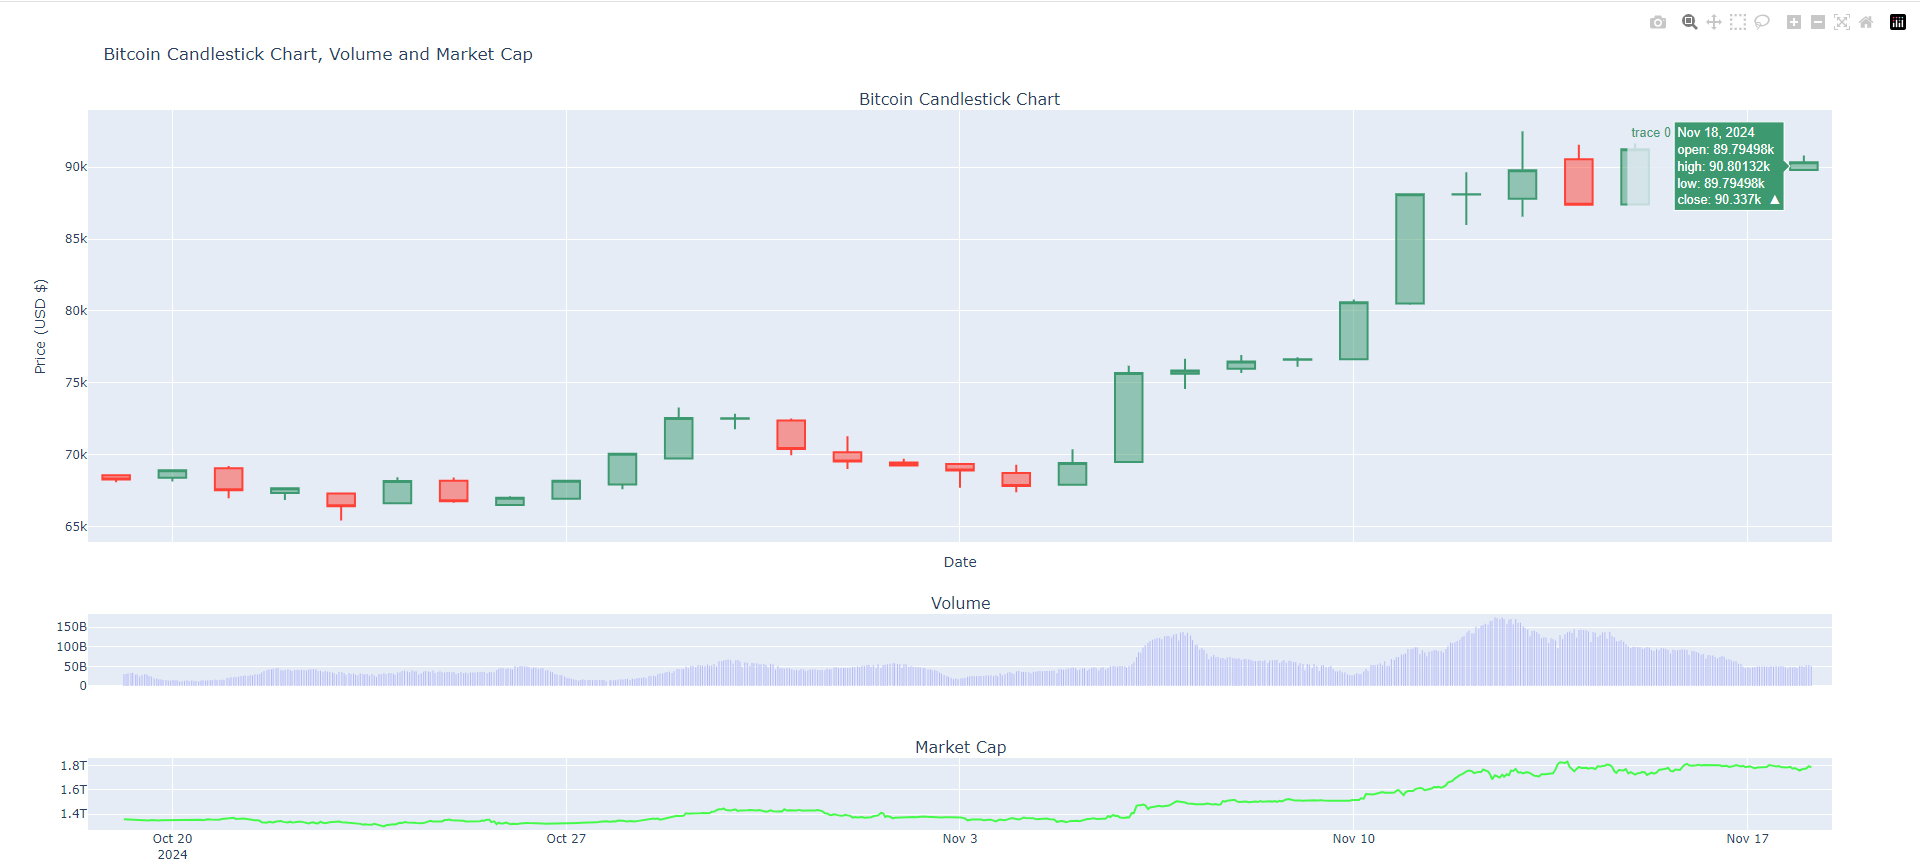

In [54]:
from IPython.display import Image

# Specify the path to the image
image_path = r'C:\Users\Buba\Documents\CURSOS-PROGRAMACION\IT-Academy\Upskilling-ML-negoci\Sprint-4\bitcoin_candlestick_graph.jpg'

# Display the image
Image(filename=image_path)



--------------------------------------

 # **Exercici 2. Obtener datos con Web Scraping**

## Web Scraping de la web de Interflora para productos de Navidad

El objetivo del proyecto de web scraping de **Interflora** es recopilar información detallada sobre los **productos navideños** disponibles en la tienda online de Interflora. A través de este proceso de scraping, buscamos procesar datos de productos en **tiempo real** directamente desde el sitio web para extraer detalles clave de los productos, como **nombres, descripciones, precios e imágenes de los centros de mesa, ramos, arreglos florales y artículos de regalo** de Navidad. 

## Importar librerías

Este bloque importa las librerías esenciales para realizar la web scraping, manejar imágenes y crear el DataFrame final.

- requests: Para enviar solicitudes HTTP y obtener el contenido HTML de la página.
- BeautifulSoup: Para analizar y extraer los datos del HTML.
- pandas: Para crear y manipular el DataFrame donde se almacenarán los datos.
- PIL: Para descargar y procesar las imágenes (convertirlas a un formato que podamos manejar y redimensionarlas).
- IPython.display: Para mostrar las imágenes en el Jupyter Notebook.


In [36]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from PIL import Image
from io import BytesIO
from IPython.display import display


## Definir la URL y las cabeceras (headers)

- url: La URL del sitio web donde vamos a realizar el scraping.
- headers: Son las cabeceras necesarias para simular una solicitud proveniente de un navegador web y evitar bloqueos por parte del servidor.

In [37]:
# Definir la URL y las cabeceras
url = "https://www.interflora.es/c/fiestas/centros-navidenos"
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.111 Safari/537.36'
}


## Enviar la solicitud y obtener la página

Se realiza la solicitud a la URL definida y se verifica si la respuesta es exitosa.

- requests.get(): Envia una solicitud GET a la URL para obtener el contenido HTML.
- response.status_code: Verifica el código de estado de la respuesta. Si es 200, la solicitud fue exitosa y se almacena el contenido de la página.

In [38]:
# Enviar la solicitud para obtener el contenido de la página
response = requests.get(url, headers=headers)

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    html_content = response.text
else:
    print(f"Failed to retrieve page: {response.status_code}")


## Parsear el HTML con BeautifulSoup

Se convierte el HTML obtenido en un formato que podamos manipular fácilmente para extraer los datos. BeautifulSoup: Convierte el contenido HTML en un objeto que facilita la búsqueda y extracción de datos.

In [39]:
# Parsear el contenido HTML con BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')


## Extraer los productos de la página

En este bloque buscamos todos los productos en la página web utilizando la clase o atributo que los identifica.

- find_all(): Busca todos los elementos que coinciden con el selector especificado, en este caso, los productos representados por la etiqueta **li** que tiene el atributo data-tracking-product.

In [43]:
# Encontrar todas las entradas de productos en la página
products = soup.find_all('li', {'data-tracking-product': True})


## Extraer los detalles de cada producto

- Se recorre cada producto y extrae los detalles como nombre, descripción, precio y URL de la imagen.
- Para la imagen, se busca el enlace de mayor resolución en el srcset, y si no se encuentra, se recurre al atributo src del img.

In [44]:
# Inicializar una lista vacía para almacenar los datos de los productos
product_list = []

# Recorrer cada entrada de producto para extraer los detalles relevantes
for product in products:
    # Extraer el nombre del producto
    name = product.find('h2', class_='TeaserCard-title').text.strip()

    # Extraer la descripción del producto (o un valor por defecto si no está disponible)
    description = product.find('div', class_='TeaserCard-desc').text.strip() if product.find('div', class_='TeaserCard-desc') else 'No description'

    # Extraer el precio del producto
    price = product.find('span', class_='TagPrice').text.strip()

    # Extraer la URL de la imagen desde srcset (elegir el tamaño de imagen más grande)
    img_tag = product.find('picture')
    if img_tag:
        # Buscar la URL de la imagen en el srcset
        srcset = img_tag.find_all('source')
        for source in srcset:
            if 'media="(min-width: 1280px)"' in str(source):
                image_url = source['srcset']
                break
        else:
            # Fallback al atributo src del <img> si no se encuentra una URL adecuada en el srcset
            image_url = img_tag.find('img')['src']
    else:
        image_url = 'No image available'

    # Descargar y redimensionar la imagen
    try:
        img_response = requests.get(image_url)
        img = Image.open(BytesIO(img_response.content))
        img_resized = img.resize((400, 400))  # Redimensionar a 400x400
        product_list.append({
            'Product Name': name,
            'Description': description,
            'Price': price,
            'Image URL': image_url,  # Añadir la URL de la imagen
            'Image': img_resized  # Añadir la imagen redimensionada
        })
    except Exception as e:
        print(f"Failed to load image for {name}: {e}")
        product_list.append({
            'Product Name': name,
            'Description': description,
            'Price': price,
            'Image URL': 'No image available',
            'Image': None  # No imagen si falla
        })



## Convertir los datos en un DataFrame

- Una vez que tenemos los datos de todos los productos, convertimos la lista de diccionarios en un DataFrame para facilitar su manipulación.

- pd.DataFrame(): Convierte la lista de diccionarios en un DataFrame, donde cada diccionario representa una fila y las claves son los nombres de las columnas.

In [45]:
# Convertir la lista de diccionarios en un DataFrame
df = pd.DataFrame(product_list)

# Mostrar el DataFrame con todos los productos
df.head()


Product Name                                        Description  \
0      Brillo Navideño  Centro de mesa, donde las flores calientan el ...   
1  Secreto de Invierno               Explosión de tonalidades y tradición   
2      Luces Navideñas       Un jardín encantado en tonos verdes y rojos.   
3               Te amo                     Caja de flores con rosas rojas   
4              Sicilia                          Centro de Gerberas Fucsia   

    Price                                          Image URL  \
0  47,99€  https://www.interflora.es/fstrz/r/s/www.datocm...   
1  59,99€  https://www.interflora.es/fstrz/r/s/www.datocm...   
2  54,99€  https://www.interflora.es/fstrz/r/s/www.datocm...   
3  59,99€  https://www.interflora.es/fstrz/r/s/www.datocm...   
4  39,99€  https://www.interflora.es/fstrz/r/s/www.datocm...   

                                               Image  
0  <PIL.Image.Image image mode=RGB size=400x400 a...  
1  <PIL.Image.Image image mode=RGB size=400x400 a...  
2  <PIL.Image.Image image mode=RGB size=400x400 a...  
3  <PIL.Image.Image image mode=RGB size=400x400 a...  
4  <PIL.Image.Image image mode=RGB size=400x400 a...

## Convertir el precio a formato numérico

Aquí convertimos la columna de precios, que actualmente es un string con el símbolo de euro, en un valor numérico (float) para poder realizar análisis y manipulaciones con él.



In [46]:
# Eliminar el símbolo de euro y convertir a float
df['Price'] = df['Price'].replace({'€': '', ',': '.'}, regex=True).astype(float)

# Asegurar que la columna Price sea de tipo float32
df['Price'] = df['Price'].astype('float32')

# Mostrar el DataFrame con la columna de precios numéricos
df.head()


Product Name                                        Description  \
0      Brillo Navideño  Centro de mesa, donde las flores calientan el ...   
1  Secreto de Invierno               Explosión de tonalidades y tradición   
2      Luces Navideñas       Un jardín encantado en tonos verdes y rojos.   
3               Te amo                     Caja de flores con rosas rojas   
4              Sicilia                          Centro de Gerberas Fucsia   

       Price                                          Image URL  \
0  47.990002  https://www.interflora.es/fstrz/r/s/www.datocm...   
1  59.990002  https://www.interflora.es/fstrz/r/s/www.datocm...   
2  54.990002  https://www.interflora.es/fstrz/r/s/www.datocm...   
3  59.990002  https://www.interflora.es/fstrz/r/s/www.datocm...   
4  39.990002  https://www.interflora.es/fstrz/r/s/www.datocm...   

                                               Image  
0  <PIL.Image.Image image mode=RGB size=400x400 a...  
1  <PIL.Image.Image image mode=RGB size=400x400 a...  
2  <PIL.Image.Image image mode=RGB size=400x400 a...  
3  <PIL.Image.Image image mode=RGB size=400x400 a...  
4  <PIL.Image.Image image mode=RGB size=400x400 a...

## Mostrar la tabla con imágenes

- Mostrar la tabla de productos con precio en formato adecuado (con dos decimales y símbolo del euro)
- Aquí vamos a formatear la columna de precio a un formato numérico con dos decimales y luego a mostrarlo con el símbolo de euro.

- El valor en row['Price'] ya es un float, por lo que podemos formatearlo directamente usando f"{row['Price']:0.2f}" para asegurar que se muestren dos decimales.
- Después de formatearlo, agregamos el símbolo de euro (€) al final del precio formateado.

Producto: Brillo Navideño, Precio: 47.99€
Descripción: Centro de mesa, donde las flores calientan el ambiente.


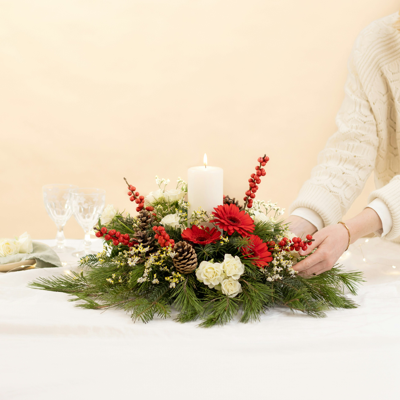


------------------------------------------------------------

Producto: Secreto de Invierno, Precio: 59.99€
Descripción: Explosión de tonalidades y tradición


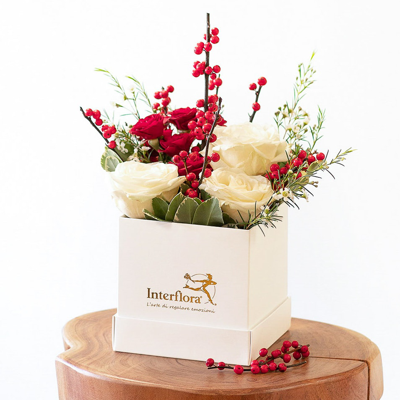


------------------------------------------------------------

Producto: Luces Navideñas, Precio: 54.99€
Descripción: Un jardín encantado en tonos verdes y rojos.


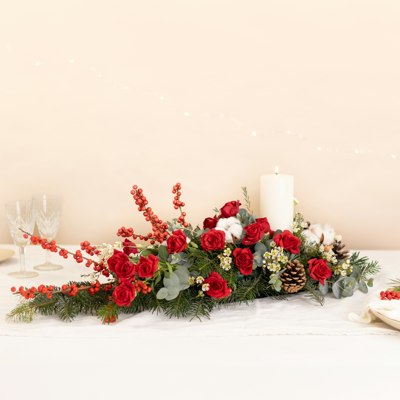


------------------------------------------------------------

Producto: Te amo, Precio: 59.99€
Descripción: Caja de flores con rosas rojas


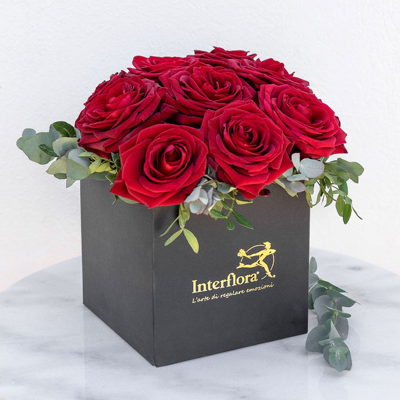


------------------------------------------------------------

Producto: Sicilia, Precio: 39.99€
Descripción: Centro de Gerberas Fucsia


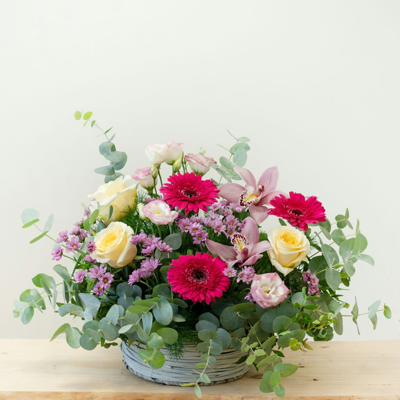


------------------------------------------------------------

Producto: Estrella de Navidad Grande, Precio: 49.99€
Descripción: Dos Poinsettias, alegría en rojo.


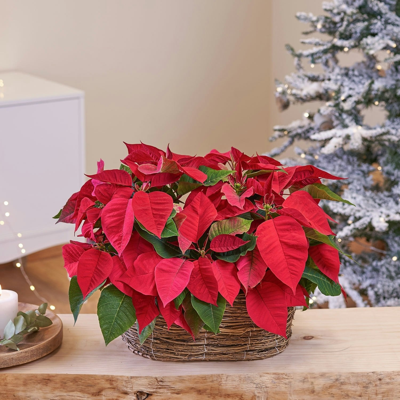


------------------------------------------------------------

Producto: Christmas Treasure, Precio: 32.99€
Descripción: Dulce regalo floral navideño


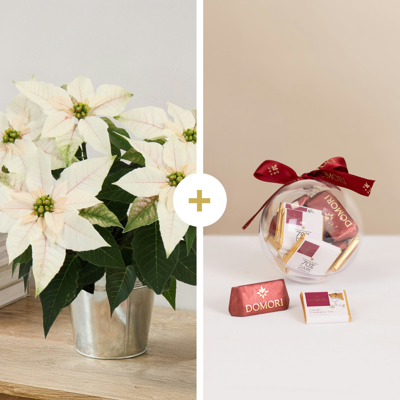


------------------------------------------------------------

Producto: Arbolito de Navidad Clasico, Precio: 24.99€
Descripción: Clásico y precioso árbol de Navidad


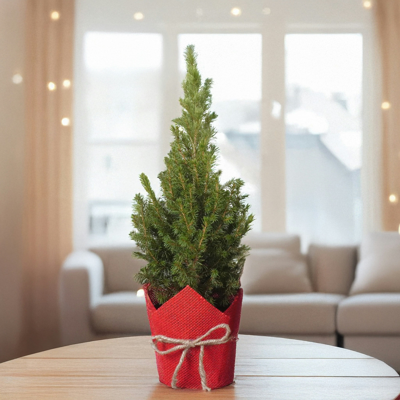


------------------------------------------------------------

Producto: Estrella de Navidad, Precio: 29.99€
Descripción: Elegancia navideña en flor roja.


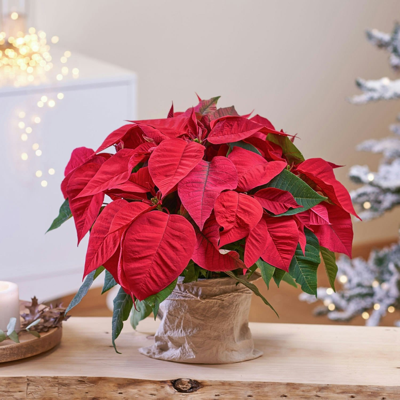


------------------------------------------------------------

Producto: Arbolito de Navidad Nevado, Precio: 27.99€
Descripción: Elegancia nevada para Navidad


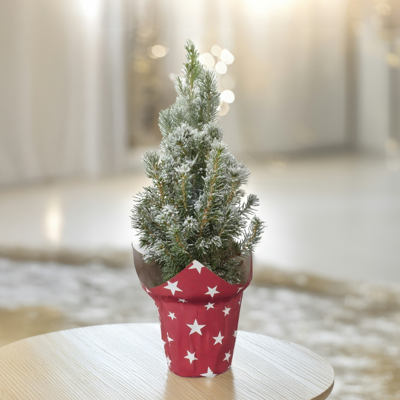


------------------------------------------------------------

Producto: Magia Navideña, Precio: 39.99€
Descripción: La danza que deleita los sentidos.


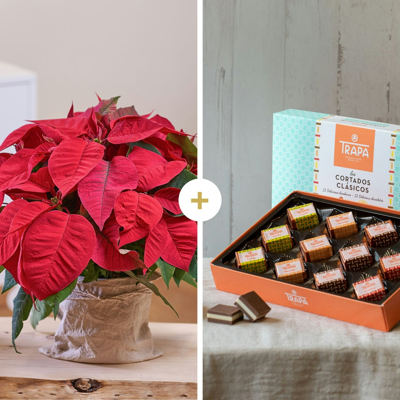


------------------------------------------------------------

Producto: Cesta de Estrella de Navidad Extra, Precio: 64.99€
Descripción: Cuatro Poinsettias, esplendor navideño.


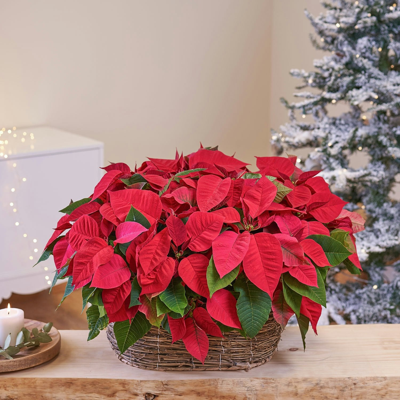


------------------------------------------------------------

Producto: Winter Charm, Precio: 29.99€
Descripción: Navidad nevada con chocolates


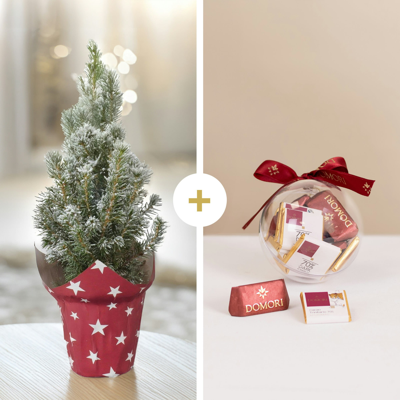


------------------------------------------------------------

Producto: Poinsettia blanca, Precio: 29.99€
Descripción: Pura gracia festiva


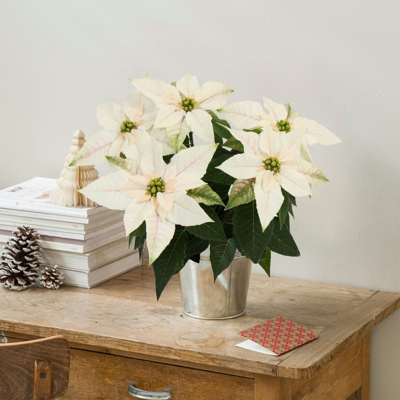


------------------------------------------------------------



In [50]:
# Mostrar la tabla de productos con el precio formateado y sin la URL de la imagen
for idx, row in df.iterrows():
    # Formatear el precio como float con 2 decimales y añadir el símbolo €
    price_formatted = f"{row['Price']:0.2f}€"
    
    print(f"Producto: {row['Product Name']}, Precio: {price_formatted}")
    print(f"Descripción: {row['Description']}")
    
    # Mostrar la imagen si está disponible
    if row['Image']:
        display(row['Image'])  # Mostrar la imagen en el notebook
    else:
        print("No image available.")
    
    print("\n" + "-"*60 + "\n")


A continuación se muestran algunos datso estructurales de la página web de Interflora que ayudaron a conseguir los resultados

- Para encontrar los productos, precios y descripciones:

- Para encontrar los productos, precios y descripciones:

Guardar el fichero en una carpeta

In [56]:
import shutil

# Path where you want to save the notebook
output_notebook_path = r'C:\Users\Buba\Documents\CURSOS-PROGRAMACION\IT-Academy\Upskilling-ML-negoci\Sprint-4\ML_API-Scraping.ipynb'

# Save the current notebook with the new name
shutil.copy('ML_API-Scraping.ipynb', output_notebook_path)


'C:\\Users\\Buba\\Documents\\CURSOS-PROGRAMACION\\IT-Academy\\Upskilling-ML-negoci\\Sprint-4\\ML_API-Scraping.ipynb'